In [ ]:
from google.colab import files
import pandas as pd

# change the file name if necessary
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Load the data into a DataFrame
# Ensure the delimiter matches your file's format
df = pd.read_csv(file_name, delimiter=',')

Saving train_all_tasks.csv to train_all_tasks.csv


In [ ]:
# Display basic info about the dataframe to understand any missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rewire_id       14000 non-null  object
 1   text            14000 non-null  object
 2   label_sexist    14000 non-null  object
 3   label_category  14000 non-null  object
 4   label_vector    14000 non-null  object
 5   text_length     14000 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 656.4+ KB
None


In [ ]:
# Display the first few rows of the dataframe
print(df.head())

                  rewire_id  \
0   sexism2022_english-7358   
1   sexism2022_english-2367   
2   sexism2022_english-3073   
3  sexism2022_english-14895   
4   sexism2022_english-4118   

                                                text label_sexist  \
0                        damn writing pretty chaotic   not sexist   
1  yeah apparently bunch misogynistic virgins one...   not sexist   
2                                fuck woman still mp   not sexist   
3  understand know youre right time know isnt eno...   not sexist   
4                    surprized didnt stop rape women   not sexist   

  label_category label_vector  text_length  
0           none         none           27  
1           none         none           75  
2           none         none           19  
3           none         none           94  
4           none         none           31  


In [ ]:
# Check for and sum up any missing values by column
print(df.isnull().sum())

rewire_id         0
text              0
label_sexist      0
label_category    0
label_vector      0
text_length       0
dtype: int64


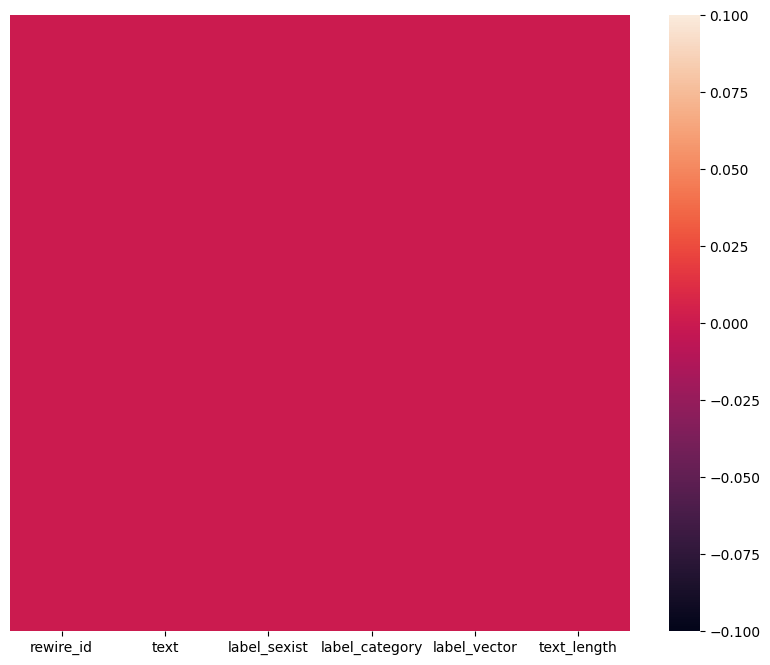

In [ ]:
# Checking nan values in dataset using heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(), yticklabels = False)
plt.show()

In [ ]:
# Drop rows with any missing 'text' or 'label_sexist' data
if df.isnull().sum().any():
    df.dropna(subset=['text', 'label_sexist'], inplace=True)

In [ ]:
df.columns

Index(['rewire_id', 'text', 'label_sexist', 'label_category', 'label_vector',
       'text_length'],
      dtype='object')

In [ ]:
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Check if 'text' column exists in DataFrame
if 'text' in df.columns:
    # Apply preprocessing to each text entry
    df['text'] = df['text'].apply(preprocess_text)
    # Check the processed text
    print(df.head())
else:
    print("'text' column does not exist in the DataFrame.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                  rewire_id  \
0   sexism2022_english-7358   
1   sexism2022_english-2367   
2   sexism2022_english-3073   
3  sexism2022_english-14895   
4   sexism2022_english-4118   

                                                text label_sexist  \
0                        damn writing pretty chaotic   not sexist   
1  yeah apparently bunch misogynistic virgins one...   not sexist   
2                                fuck woman still mp   not sexist   
3  understand know youre right time know isnt eno...   not sexist   
4                    surprized didnt stop rape women   not sexist   

  label_category label_vector  text_length  
0           none         none           27  
1           none         none           75  
2           none         none           19  
3           none         none           94  
4           none         none           31  


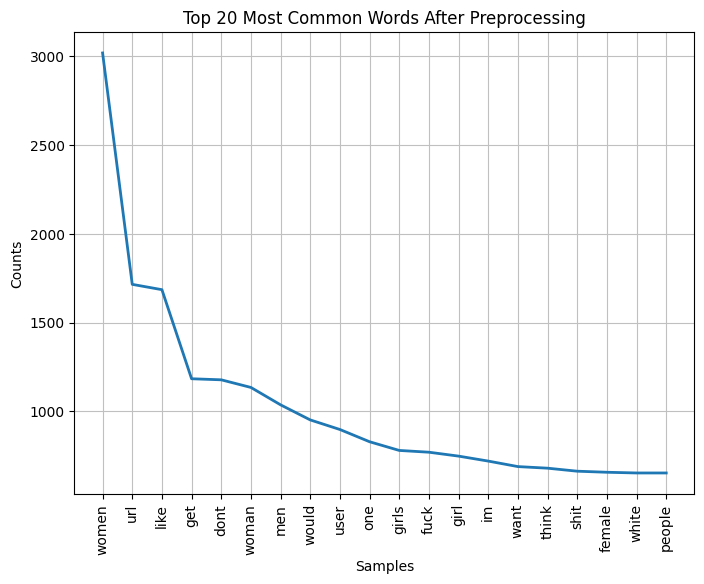

In [ ]:
import matplotlib.pyplot as plt

# Assuming df['text'] contains preprocessed text
text_series = df['text']

# Combine all preprocessed text into a single string
combined_text = ' '.join(text_series)

# Tokenize the text
tokens = combined_text.split()

# Calculate word frequency
word_freq = nltk.FreqDist(tokens)

# Plot the most common words
plt.figure(figsize=(8, 6))
word_freq.plot(20, title='Top 20 Most Common Words After Preprocessing')
plt.show()


label_sexist
not sexist    10602
sexist         3398
Name: count, dtype: int64


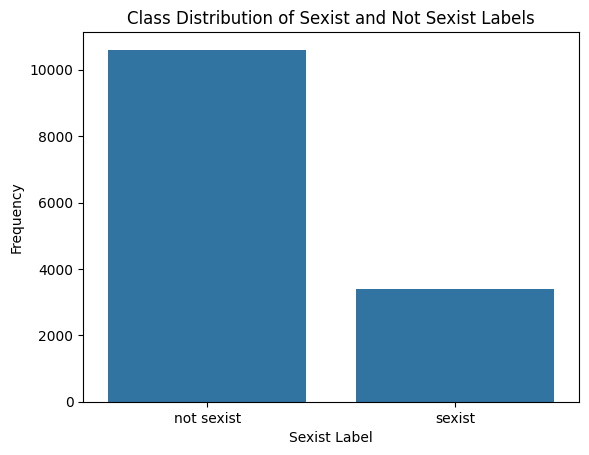

In [ ]:
# Data Analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Class distribution
class_distribution = df['label_sexist'].value_counts()
print(class_distribution)

# Plot the distribution
sns.countplot(x=df['label_sexist'])
plt.title('Class Distribution of Sexist and Not Sexist Labels')
plt.xlabel('Sexist Label')
plt.ylabel('Frequency')
plt.show()

Average length by label:
label_sexist
not sexist    80.829938
sexist        86.443496
Name: text_length, dtype: float64


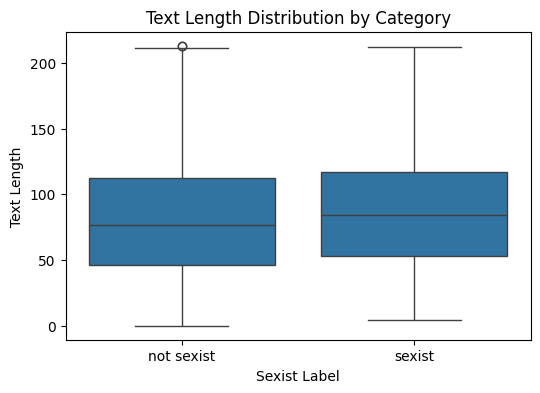

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate text length and group by label_sexist
df['text_length'] = df['text'].apply(len)
average_length_by_label = df.groupby('label_sexist')['text_length'].mean()
print("Average length by label:")
print(average_length_by_label)

# Boxplot for text length distribution by category
plt.figure(figsize=(6, 4))
sns.boxplot(x='label_sexist', y='text_length', data=df)
plt.title('Text Length Distribution by Category')
plt.xlabel('Sexist Label')
plt.ylabel('Text Length')
plt.show()

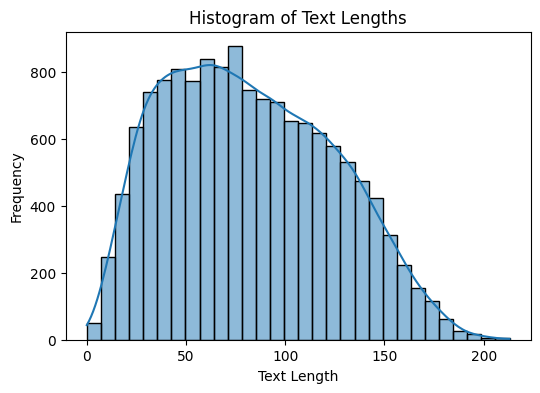

In [ ]:
# Histogram of Text Lengths
plt.figure(figsize=(6, 4))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Histogram of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

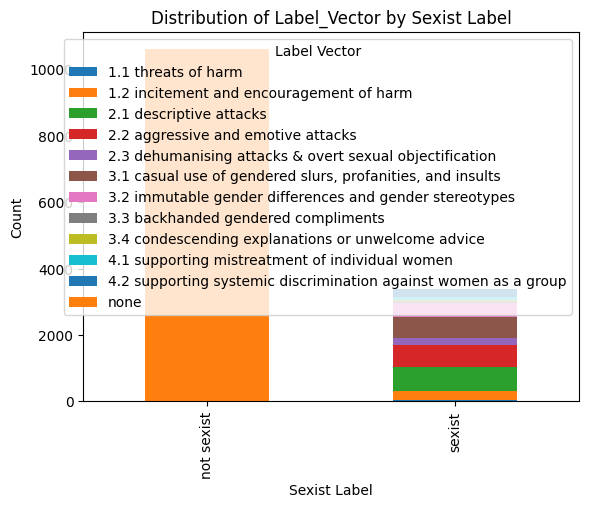

In [ ]:
# Distribution of Label_Vector by Sexist Label

import matplotlib.pyplot as plt

# Group by 'label_sexist' and 'label_vector', then count occurrences
grouped = df.groupby(['label_sexist', 'label_vector']).size().unstack()

# Plot grouped bar chart
grouped.plot(kind='bar', stacked=True)
plt.title('Distribution of Label_Vector by Sexist Label')
plt.xlabel('Sexist Label')
plt.ylabel('Count')
plt.legend(title='Label Vector')
plt.show()


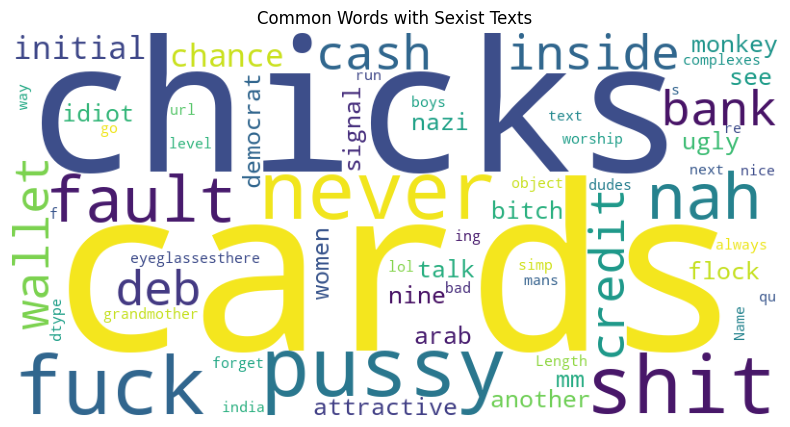

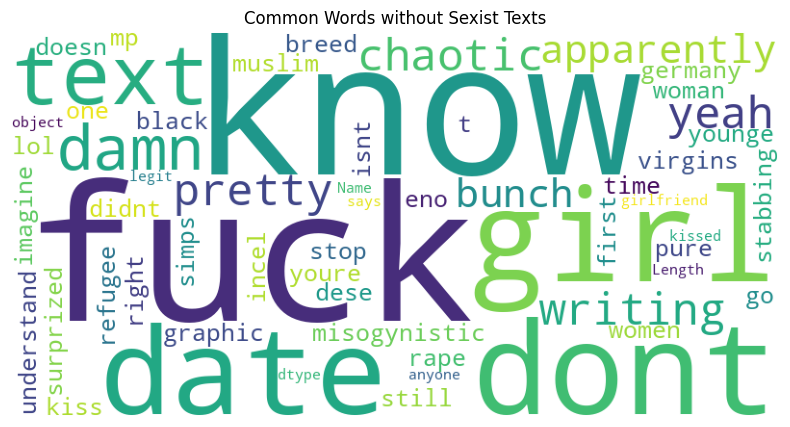

In [ ]:
# Text Analysis

from wordcloud import WordCloud

# Function to generate a word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(str(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word clouds for each category
sexist_text = df[df['label_sexist'] == 'sexist']['text']
not_sexist_text = df[df['label_sexist'] == 'not sexist']['text']

generate_word_cloud(sexist_text, 'Common Words with Sexist Texts')
generate_word_cloud(not_sexist_text, 'Common Words without Sexist Texts')


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Model Selection

## RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Splitting the dataset into features and labels
X = df['text']  # Features
y = df['label_sexist']  # Target labels

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the text in the training and testing sets
X_train = X_train.apply(preprocess_text)
X_test = X_test.apply(preprocess_text)

# Vectorizing the text data
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Training the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Predicting on the testing set
y_pred = rf_classifier.predict(X_test_tfidf)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest Classifier:", accuracy)

Accuracy of Random Forest Classifier: 0.8228571428571428


Classification Report:
              precision    recall  f1-score   support

  not sexist       0.82      0.98      0.89      2096
      sexist       0.88      0.34      0.49       704

    accuracy                           0.82      2800
   macro avg       0.85      0.66      0.69      2800
weighted avg       0.83      0.82      0.79      2800


Confusion Matrix:
[[2064   32]
 [ 464  240]]


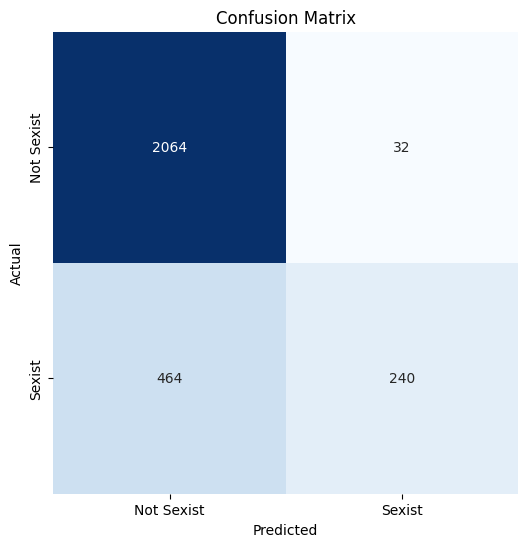

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=['Not Sexist', 'Sexist'])
plt.yticks(ticks=[0.5, 1.5], labels=['Not Sexist', 'Sexist'])
plt.show()

In [ ]:
## SVM Classifier

import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Splitting the dataset into features and labels
X = df['text']  # Features
y = df['label_sexist']  # Target labels

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a preprocess_text function
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Removing punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Tokenization
    tokens = word_tokenize(text)
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in tokens]
    # Joining stemmed tokens back into a string
    preprocessed_text = ' '.join(stemmed)
    return preprocessed_text

# Preprocess the text in the training and testing sets
X_train = X_train.apply(preprocess_text)
X_test = X_test.apply(preprocess_text)

# Vectorizing the text data
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Training the SVM Classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)

# Predicting on the testing set
y_pred = svm_classifier.predict(X_test_tfidf)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of SVM Classifier:", accuracy)


Accuracy of SVM Classifier: 0.8289285714285715


Classification Report:
              precision    recall  f1-score   support

  not sexist       0.83      0.98      0.90      2096
      sexist       0.85      0.39      0.53       704

    accuracy                           0.83      2800
   macro avg       0.84      0.68      0.71      2800
weighted avg       0.83      0.83      0.80      2800


Confusion Matrix:
[[2046   50]
 [ 429  275]]


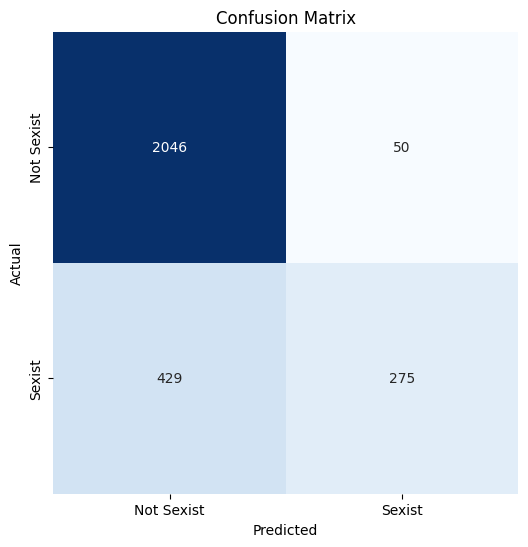

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=['Not Sexist', 'Sexist'])
plt.yticks(ticks=[0.5, 1.5], labels=['Not Sexist', 'Sexist'])
plt.show()

In [ ]:
# AdaBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Splitting the dataset into features and labels
X = df['text']  # Features
y = df['label_sexist']  # Target labels

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a preprocess_text function
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Removing punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Tokenization
    tokens = word_tokenize(text)
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in tokens]
    # Joining stemmed tokens back into a string
    preprocessed_text = ' '.join(stemmed)
    return preprocessed_text

# Preprocess the text in the training and testing sets
X_train = X_train.apply(preprocess_text)
X_test = X_test.apply(preprocess_text)

# Vectorizing the text data
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Training the AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_classifier.fit(X_train_tfidf, y_train)

# Predicting on the testing set
y_pred = adaboost_classifier.predict(X_test_tfidf)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of AdaBoost Classifier:", accuracy)


Accuracy of AdaBoost Classifier: 0.825


Classification Report:
              precision    recall  f1-score   support

  not sexist       0.83      0.96      0.89      2096
      sexist       0.77      0.44      0.56       704

    accuracy                           0.82      2800
   macro avg       0.80      0.70      0.72      2800
weighted avg       0.82      0.82      0.81      2800


Confusion Matrix:
[[2002   94]
 [ 396  308]]


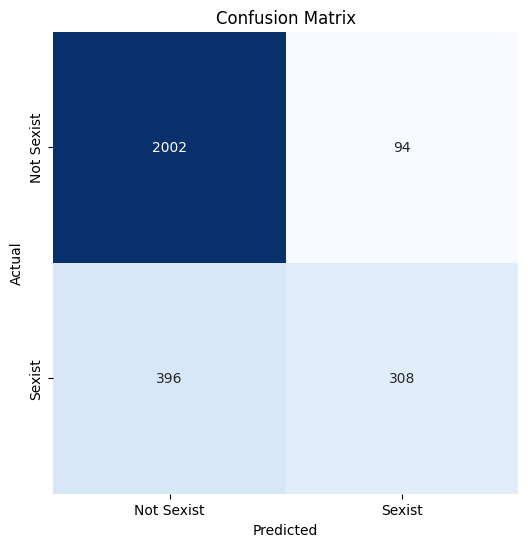

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=['Not Sexist', 'Sexist'])
plt.yticks(ticks=[0.5, 1.5], labels=['Not Sexist', 'Sexist'])
plt.show()

In [ ]:
# Data Processing

# Step 1: Filter the dataset to include only posts labeled as sexist
sexist_posts = df[df['label_sexist'] == 'sexist'].copy()

# Step 2: Encode the target labels ("label_category") into numerical values corresponding to each category
# Mapping numerical values to each category
category_mapping = {
    "1. threats, plans to harm and incitement": 1,
    "2. derogation": 2,
    "3. animosity": 3,
    "4. prejudiced discussions": 4
}

# Encode the labels
sexist_posts['encoded_label_category'] = sexist_posts['label_category'].map(category_mapping)

# Check the frequency of the encoded labels
category_frequency = sexist_posts['encoded_label_category'].value_counts()
print("Frequency of Encoded Labels:")
print(category_frequency)


Frequency of Encoded Labels:
encoded_label_category
2    1590
3    1165
4     333
1     310
Name: count, dtype: int64


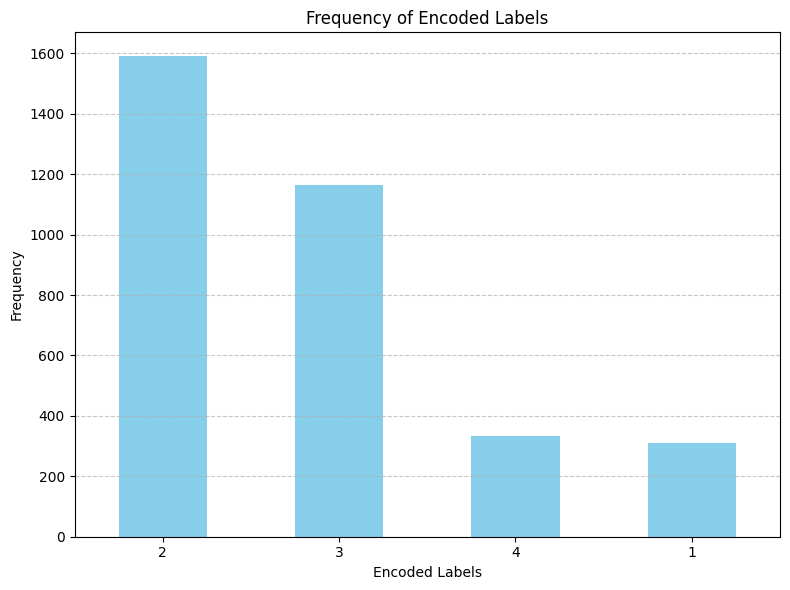

In [ ]:
import matplotlib.pyplot as plt

# Plotting the frequency of encoded labels
plt.figure(figsize=(8, 6))
category_frequency.plot(kind='bar', color='skyblue')
plt.title('Frequency of Encoded Labels')
plt.xlabel('Encoded Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Feature Engineering

# Step 1: Preprocess the text data
def preprocess_text(text):
    # Your preprocessing steps here
    processed_text = text.lower()  # Example: Convert text to lowercase
    return processed_text

sexist_posts['processed_text'] = sexist_posts['text'].apply(preprocess_text)

# Step 2: Vectorize the text data using TF-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the processed text data
tfidf_matrix = tfidf_vectorizer.fit_transform(sexist_posts['processed_text'])

# Convert the TF-IDF matrix to a DataFrame for better visualization (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Check the shape of the TF-IDF matrix
print("Shape of TF-IDF matrix:", tfidf_matrix.shape)


Shape of TF-IDF matrix: (3398, 9414)


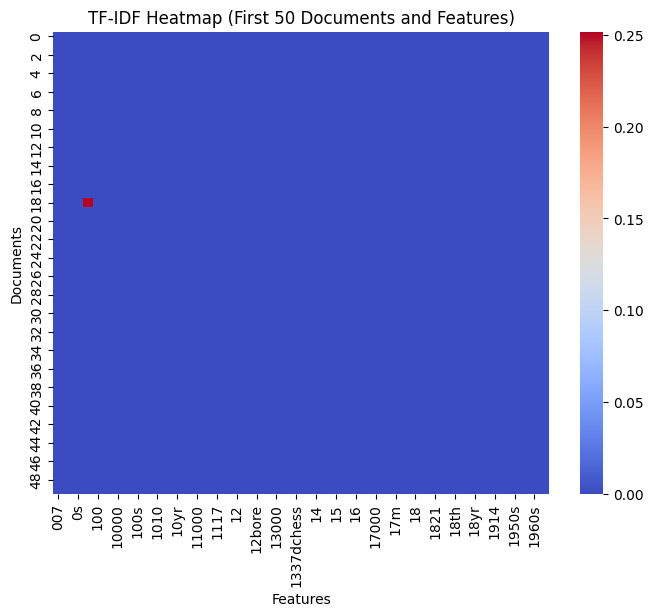

In [ ]:
import seaborn as sns

# Plot heatmap of TF-IDF matrix
plt.figure(figsize=(8, 6))
sns.heatmap(tfidf_df.iloc[:50, :50], cmap='coolwarm', annot=False, fmt='.2f')
plt.title('TF-IDF Heatmap (First 50 Documents and Features)')
plt.xlabel('Features')
plt.ylabel('Documents')
plt.show()


In [ ]:
# SVM

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Split the dataset into features (TF-IDF matrix) and target labels
X = tfidf_matrix
y = sexist_posts['encoded_label_category']

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the SVM model on the training data
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

# Step 4: Evaluate the trained model's performance
# Predict on the testing set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.5352941176470588

Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.30      0.44        57
           2       0.54      0.77      0.63       328
           3       0.48      0.38      0.43       227
           4       0.73      0.12      0.20        68

    accuracy                           0.54       680
   macro avg       0.64      0.39      0.42       680
weighted avg       0.56      0.54      0.50       680


Confusion Matrix:
[[ 17  30   9   1]
 [  2 252  73   1]
 [  1 138  87   1]
 [  1  47  12   8]]


Category Mapping:
dict_keys(['1. threats, plans to harm and incitement', '2. derogation', '3. animosity', '4. prejudiced discussions'])


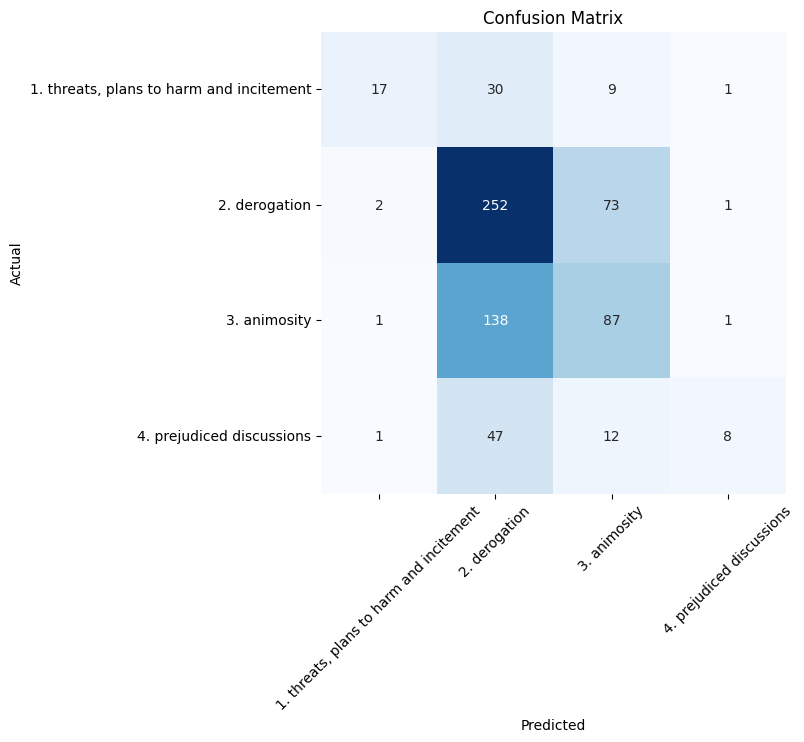

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

print("Category Mapping:")
print(category_mapping.keys())

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=np.arange(0.5, len(category_mapping.keys()) + 0.5), labels=list(category_mapping.keys()), rotation=45)
plt.yticks(ticks=np.arange(0.5, len(category_mapping.keys()) + 0.5), labels=list(category_mapping.keys()), rotation=0)
plt.show()

In [ ]:
# Step 1: The "label_vector" column should contain sexist

# Step 2: Verify the structure of the dataset and ensure it includes the necessary columns.
print("Dataset Structure:")
print(df.info())

# Step 3: Feature Engineering
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Download stopwords list if not already downloaded
nltk.download('stopwords')

# Preprocess the text data
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply text preprocessing
df['clean_text'] = df['text'].apply(preprocess_text)

# Vectorize the preprocessed text data using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['clean_text'])

# Display the shape of the TF-IDF matrix
print("Shape of TF-IDF matrix:", tfidf_matrix.shape)

Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rewire_id       14000 non-null  object
 1   text            14000 non-null  object
 2   label_sexist    14000 non-null  object
 3   label_category  14000 non-null  object
 4   label_vector    14000 non-null  object
 5   text_length     14000 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 656.4+ KB
None


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Shape of TF-IDF matrix: (14000, 22777)


In [ ]:
#LSTM

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
# Assuming df is your DataFrame containing the dataset
texts = df['text']
labels = df['label_vector']

# Split the dataset into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_texts)
train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

# Pad sequences to ensure uniform length
max_len = max(len(seq) for seq in train_sequences)
train_sequences = pad_sequences(train_sequences, maxlen=max_len, padding='post')
test_sequences = pad_sequences(test_sequences, maxlen=max_len, padding='post')

# Convert labels to numerical values
label_dict = {label: idx for idx, label in enumerate(labels.unique())}
train_labels = [label_dict[label] for label in train_labels]
test_labels = [label_dict[label] for label in test_labels]

# Convert labels to numpy arrays
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=max_len))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(len(label_dict), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_sequences, train_labels, epochs=10, batch_size=64, validation_data=(test_sequences, test_labels))

# Get raw predictions
predictions = model.predict(test_sequences)
# Convert probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Evaluate the model
accuracy = accuracy_score(test_labels, predicted_labels)
print("Accuracy:", accuracy)

classification_rep = classification_report(test_labels, predicted_labels)
print("Classification Report:")
print(classification_rep)

conf_matrix = confusion_matrix(test_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)


Epoch 1/10
175/175 [==============================] - 31s 159ms/step - loss: 1.1128 - accuracy: 0.7554 - val_loss: 1.0840 - val_accuracy: 0.7479
Epoch 2/10
175/175 [==============================] - 27s 155ms/step - loss: 0.9037 - accuracy: 0.7667 - val_loss: 0.9704 - val_accuracy: 0.7543
Epoch 3/10
175/175 [==============================] - 29s 168ms/step - loss: 0.6912 - accuracy: 0.7985 - val_loss: 1.0565 - val_accuracy: 0.7643
Epoch 4/10
175/175 [==============================] - 30s 172ms/step - loss: 0.5909 - accuracy: 0.8178 - val_loss: 1.0271 - val_accuracy: 0.7546
Epoch 5/10
175/175 [==============================] - 29s 164ms/step - loss: 0.5353 - accuracy: 0.8285 - val_loss: 1.2042 - val_accuracy: 0.7268
Epoch 6/10
175/175 [==============================] - 38s 215ms/step - loss: 0.4931 - accuracy: 0.8361 - val_loss: 1.2116 - val_accuracy: 0.7021
Epoch 7/10
175/175 [==============================] - 44s 249ms/step - loss: 0.4515 - accuracy: 0.8487 - val_loss: 1.3349 - val_ac

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


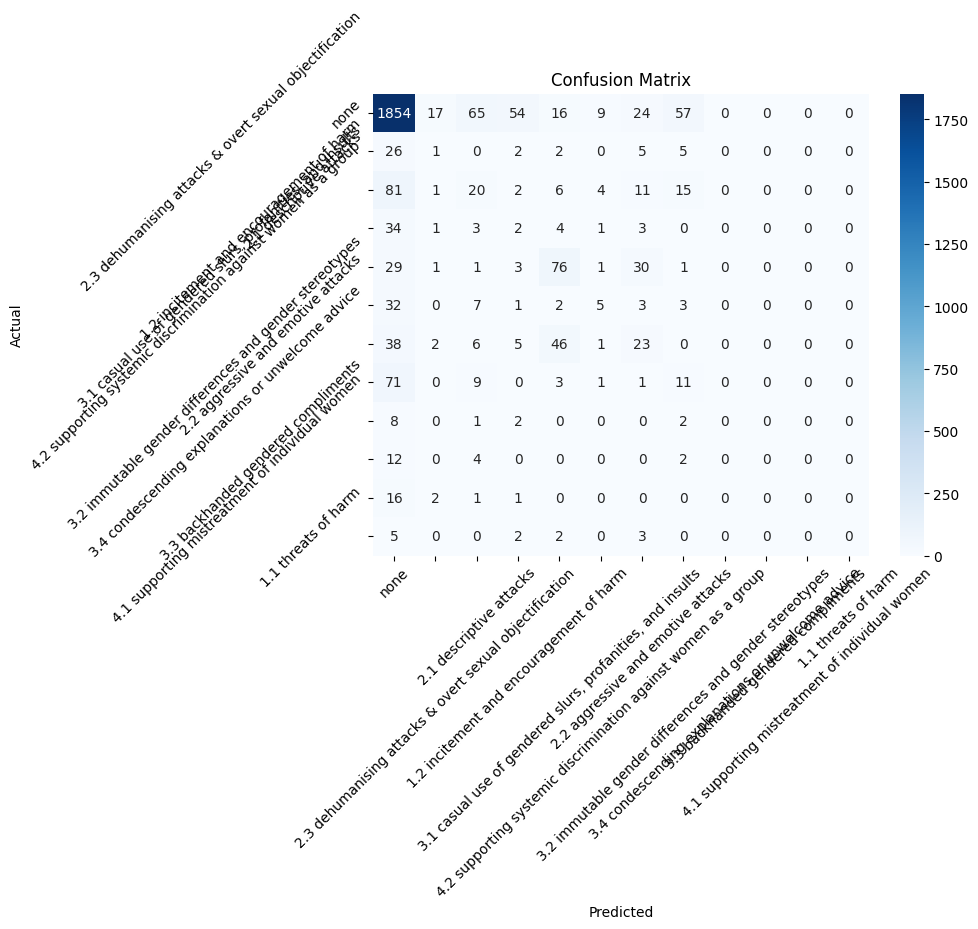

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_dict.keys(), yticklabels=label_dict.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


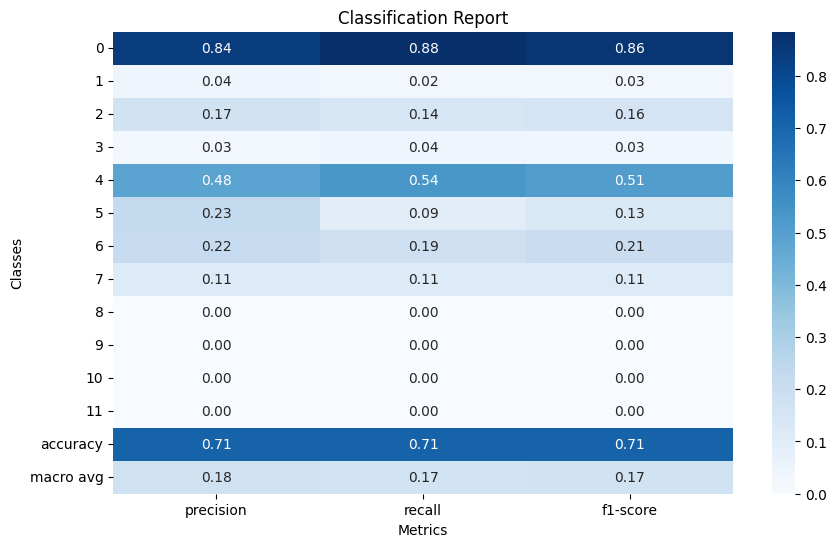

In [ ]:
from sklearn.metrics import classification_report

# Convert classification report to a DataFrame
report_dict = classification_report(test_labels, predicted_labels, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Plot classification report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f')
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

Epoch 1/10
175/175 [==============================] - 46s 223ms/step - loss: 1.1185 - accuracy: 0.7550 - val_loss: 1.0907 - val_accuracy: 0.7486
Epoch 2/10
175/175 [==============================] - 27s 155ms/step - loss: 0.9118 - accuracy: 0.7642 - val_loss: 0.9857 - val_accuracy: 0.7543
Epoch 3/10
175/175 [==============================] - 29s 167ms/step - loss: 0.7060 - accuracy: 0.7923 - val_loss: 1.0014 - val_accuracy: 0.7621
Epoch 4/10
175/175 [==============================] - 28s 162ms/step - loss: 0.6009 - accuracy: 0.8146 - val_loss: 1.0436 - val_accuracy: 0.7364
Epoch 5/10
175/175 [==============================] - 30s 174ms/step - loss: 0.5347 - accuracy: 0.8271 - val_loss: 1.1528 - val_accuracy: 0.7282
Epoch 6/10
175/175 [==============================] - 29s 166ms/step - loss: 0.4863 - accuracy: 0.8343 - val_loss: 1.2033 - val_accuracy: 0.7096
Epoch 7/10
175/175 [==============================] - 29s 163ms/step - loss: 0.4416 - accuracy: 0.8467 - val_loss: 1.2583 - val_ac

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


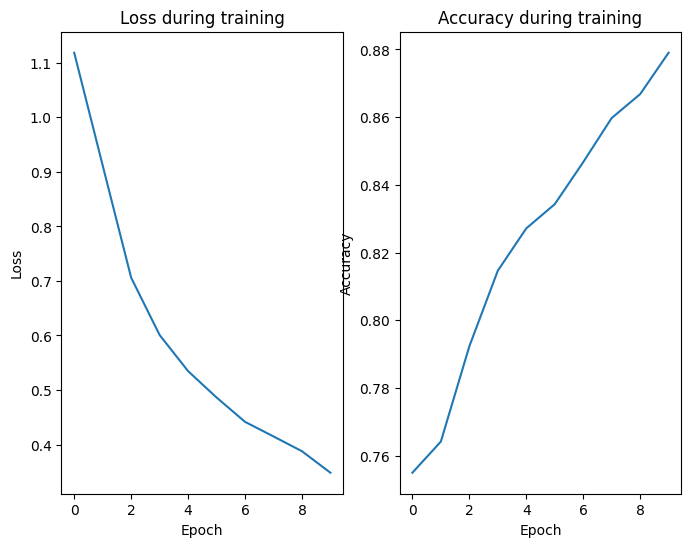

In [ ]:
# Loss & Accuracy During Training

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the dataset
# Assuming df is your DataFrame containing the dataset
texts = df['text']
labels = df['label_vector']

# Split the dataset into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_texts)
train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

# Pad sequences to ensure uniform length
max_len = max(len(seq) for seq in train_sequences)
train_sequences = pad_sequences(train_sequences, maxlen=max_len, padding='post')
test_sequences = pad_sequences(test_sequences, maxlen=max_len, padding='post')

# Convert labels to numerical values
label_dict = {label: idx for idx, label in enumerate(labels.unique())}
train_labels = [label_dict[label] for label in train_labels]
test_labels = [label_dict[label] for label in test_labels]

# Convert labels to numpy arrays
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=max_len))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(len(label_dict), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks for tracking loss and accuracy during training
class LossAccuracyHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.accuracies = []

    def on_epoch_end(self, epoch, logs={}):
        self.losses.append(logs.get('loss'))
        self.accuracies.append(logs.get('accuracy'))

history = LossAccuracyHistory()

# Train the model with callbacks
model.fit(train_sequences, train_labels, epochs=10, batch_size=64, validation_data=(test_sequences, test_labels), callbacks=[history])

# Get raw predictions
predictions = model.predict(test_sequences)
# Convert probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Evaluate the model
accuracy = accuracy_score(test_labels, predicted_labels)
print("Accuracy:", accuracy)

classification_rep = classification_report(test_labels, predicted_labels)
print("Classification Report:")
print(classification_rep)

conf_matrix = confusion_matrix(test_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Plot loss and accuracy during training
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(history.losses)
plt.title('Loss during training')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.accuracies)
plt.title('Accuracy during training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
